## Load Package

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import levene
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

## Load Dataset

In [2]:
data = pd.read_csv('customer_data.csv')
data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


## Data Cleaning
### Missing value

In [3]:
missing_value = data.isnull().sum()
print("Missing Value")
missing_value

Missing Value


CustomerID                  0
Gender                      0
Age                         0
Income                      5
City                        3
Region                      0
Frequency_of_Purchases      0
Average_Purchase_Amount     0
Customer_Lifespan_Months    0
Purchase_Channel            0
Date_of_Purchase            0
Churn_Status                0
dtype: int64

In [4]:
imputer = SimpleImputer(strategy= 'median')
imputer.fit(data[['Income']])
data[['Income']] = imputer.transform(data[['Income']])

In [5]:
imputer = SimpleImputer(strategy= 'most_frequent')
imputer.fit(data[['City']])
data[['City']] = imputer.transform(data[['City']])

In [6]:
missing_value = data.isnull().sum()
print("Missing Value")
missing_value

Missing Value


CustomerID                  0
Gender                      0
Age                         0
Income                      0
City                        0
Region                      0
Frequency_of_Purchases      0
Average_Purchase_Amount     0
Customer_Lifespan_Months    0
Purchase_Channel            0
Date_of_Purchase            0
Churn_Status                0
dtype: int64

### Inconsistent value

In [7]:
unique_value = data['Customer_Lifespan_Months'].unique()
unique_value

array(['3', '4', '1', '2', '5', 'XXXX'], dtype=object)

In [8]:
data = data[data['Customer_Lifespan_Months'] != 'XXXX']

In [9]:
unique_value = data['Customer_Lifespan_Months'].unique()
unique_value

array(['3', '4', '1', '2', '5'], dtype=object)

## Data Types
### Assigning correct data type

In [10]:
data.dtypes

CustomerID                   object
Gender                       object
Age                           int64
Income                      float64
City                         object
Region                       object
Frequency_of_Purchases        int64
Average_Purchase_Amount     float64
Customer_Lifespan_Months     object
Purchase_Channel             object
Date_of_Purchase             object
Churn_Status                 object
dtype: object

In [11]:
data['Customer_Lifespan_Months'] = data['Customer_Lifespan_Months'].astype(int)

In [12]:
data['Date_of_Purchase'] = data['Date_of_Purchase'].astype('datetime64[ns]')

In [13]:
data.dtypes

CustomerID                          object
Gender                              object
Age                                  int64
Income                             float64
City                                object
Region                              object
Frequency_of_Purchases               int64
Average_Purchase_Amount            float64
Customer_Lifespan_Months             int32
Purchase_Channel                    object
Date_of_Purchase            datetime64[ns]
Churn_Status                        object
dtype: object

## Duplicates value

In [14]:
duplicates =data.duplicated()
data[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
80,C021,Female,22,41743.0,Los Angeles,Northeast,4,54.599,1,Online,2023-06-08,No


In [15]:
data.drop_duplicates(inplace= True)

In [16]:
duplicates =data.duplicated()
data[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status


## Storing data by column and order

In [17]:
sorted_data = data.sort_values(by= 'Income', ascending=False)
sorted_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
55,C056,Female,29,107662.0,Houston,Northeast,3,47.877,1,In-store,2022-02-11,No
22,C023,Female,41,105186.0,Los Angeles,Midwest,14,137.697,4,Online,2023-07-15,Yes
70,C071,Female,36,103264.0,Los Angeles,Northeast,11,117.394,3,Online,2023-12-22,Yes
32,C033,Female,31,98590.0,Houston,West,7,76.114,2,Online,2023-06-30,No
52,C053,Female,45,90860.0,Houston,Northeast,10,105.287,3,In-store,2023-12-29,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
49,C050,Female,39,29104.0,Houston,Midwest,7,84.461,2,Online,2022-03-17,No
10,C011,Female,53,27958.0,Los Angeles,Midwest,10,98.449,3,In-store,2023-07-16,Yes
23,C024,Male,54,27660.0,New York,Midwest,12,125.763,3,Online,2023-07-11,Yes


## Filtering data with boolean indexing

In [18]:
male_data = data[data['Gender'] == 'Male']
male_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
7,C008,Male,38,38401.0,Houston,West,6,70.730,2,Online,2022-05-24,No
8,C009,Male,44,73105.0,Los Angeles,Northeast,12,124.887,3,Online,2022-09-02,Yes
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
17,C018,Male,39,86730.0,New York,Midwest,11,118.579,3,Online,2022-03-06,Yes


In [19]:
male_fre_data = male_data[male_data['Frequency_of_Purchases'] > 5]
male_fre_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
7,C008,Male,38,38401.0,Houston,West,6,70.730,2,Online,2022-05-24,No
8,C009,Male,44,73105.0,Los Angeles,Northeast,12,124.887,3,Online,2022-09-02,Yes
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
17,C018,Male,39,86730.0,New York,Midwest,11,118.579,3,Online,2022-03-06,Yes
18,C019,Male,32,41111.0,Los Angeles,West,14,133.229,4,Online,2023-07-19,Yes
19,C020,Male,28,37050.0,Los Angeles,Midwest,6,71.789,2,Online,2022-04-08,No


## Quaery method for precise filtering

In [20]:
churned_male_fre = male_fre_data.query('Churn_Status == "Yes"')
churned_male_fre

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
8,C009,Male,44,73105.0,Los Angeles,Northeast,12,124.887,3,Online,2022-09-02,Yes
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
17,C018,Male,39,86730.0,New York,Midwest,11,118.579,3,Online,2022-03-06,Yes
18,C019,Male,32,41111.0,Los Angeles,West,14,133.229,4,Online,2023-07-19,Yes
23,C024,Male,54,27660.0,New York,Midwest,12,125.763,3,Online,2023-07-11,Yes
24,C025,Male,27,45239.0,Los Angeles,West,12,127.888,3,In-store,2022-04-04,Yes
33,C034,Male,53,78203.0,Houston,Northeast,12,130.277,3,In-store,2023-06-05,Yes
38,C039,Male,43,51799.0,Houston,West,14,133.540,4,Online,2022-10-26,Yes


## Filtering data with isin method

In [21]:
churned_male_fre_city = churned_male_fre[churned_male_fre['City'].isin(['Chicago', 'Houston'])]
churned_male_fre_city

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes
15,C016,Male,37,59214.0,Houston,Midwest,10,108.902,3,Online,2022-01-02,Yes
33,C034,Male,53,78203.0,Houston,Northeast,12,130.277,3,In-store,2023-06-05,Yes
38,C039,Male,43,51799.0,Houston,West,14,133.540,4,Online,2022-10-26,Yes
41,C042,Male,53,52616.0,Houston,Northeast,11,120.311,3,Online,2022-07-15,Yes
42,C043,Male,44,66344.0,Chicago,Midwest,12,130.562,3,In-store,2023-05-17,Yes
45,C046,Male,44,59154.0,Chicago,West,15,152.291,4,Online,2022-12-07,Yes
63,C064,Male,30,58033.0,Houston,West,10,107.919,3,In-store,2023-11-16,Yes
66,C067,Male,54,58033.0,Houston,West,12,128.255,3,Online,2022-03-24,Yes


## Slicing data frame with loc and iloc

In [22]:
data.loc[0:4, 'CustomerID': 'Region']

,CustomerID,Gender,Age,Income,City,Region
0,C001,Male,49,72504.0,Chicago,Northeast
1,C002,Female,38,40881.0,New York,West
2,C003,Male,17,63333.0,New York,Northeast
3,C004,Male,34,58030.0,Chicago,Midwest
4,C005,Male,30,78889.0,Houston,Midwest


In [23]:
data.iloc[0:5, 0:6]

,CustomerID,Gender,Age,Income,City,Region
0,C001,Male,49,72504.0,Chicago,Northeast
1,C002,Female,38,40881.0,New York,West
2,C003,Male,17,63333.0,New York,Northeast
3,C004,Male,34,58030.0,Chicago,Midwest
4,C005,Male,30,78889.0,Houston,Midwest


## Filtering data for many condition

In [24]:
data[(data['Customer_Lifespan_Months'] >= 2) & (data['Customer_Lifespan_Months'] <= 5)]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,9.824100e+01,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,1.576400e+02,4,In-store,2023-07-08,Yes
5,C006,Male,52,76470.0,Chicago,Midwest,11,1.170120e+02,3,Online,2022-11-30,Yes
6,C007,Female,35,60349.0,Houston,Northeast,9,9.554400e+01,2,In-store,2023-07-20,No
7,C008,Male,38,38401.0,Houston,West,6,7.073000e+01,2,Online,2022-05-24,No
...,...,...,...,...,...,...,...,...,...,...,...,...
72,C073,Male,28,73631.0,Los Angeles,West,9,9.034400e+01,2,In-store,2022-11-20,No
75,C076,Male,44,59659.0,Houston,Midwest,14,1.345400e+02,4,Online,2023-12-25,Yes
77,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2,Online,2022-11-14,No
78,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3,In-store,2022-12-08,Yes


## Joining database horizontal

In [25]:
data2 = pd.read_csv('performance_data.csv')
data2.head()

,CustomerID,Recency,Frequency_Score,Monetary_Score
0,C001,3,2,2
1,C002,3,3,3
2,C003,4,4,4
3,C004,2,2,2
4,C005,1,1,1


In [26]:
joined_data = pd.merge(data, data2, on = 'CustomerID', how='inner')
joined_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,9.824100e+01,3,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,1.576400e+02,4,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,4.125200e+01,1,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,6.732900e+01,1,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,5.276300e+01,1,Online,2022-09-23,No,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,C075,Female,42,58033.0,Los Angeles,Northeast,4,5.798400e+01,1,Online,2023-05-13,No,2,2,2
75,C076,Male,44,59659.0,Houston,Midwest,14,1.345400e+02,4,Online,2023-12-25,Yes,4,4,4
76,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2,Online,2022-11-14,No,4,4,3
77,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3,In-store,2022-12-08,Yes,1,1,1


## Concatenate dataframes vertically

In [27]:
additional_data = pd.read_csv('additional_data.csv')
additional_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,CustomerID.1,Recency,Frequency_Score,Monetary_Score
0,C081,Male,37,50728,Chicago,West,11,75.757,2,In-store,2023-09-10,Yes,C081,2,2,1
1,C082,Female,48,69629,Los Angeles,Midwest,9,78.433,4,In-store,2023-07-15,No,C082,3,4,4
2,C083,Male,28,29184,Chicago,Northeast,7,82.794,3,Online,2023-08-25,Yes,C083,3,1,2
3,C084,Female,33,61265,Los Angeles,West,15,88.490,2,Online,2022-10-22,Yes,C084,4,1,3
4,C085,Female,30,63130,Houston,Midwest,13,108.749,3,Online,2023-04-01,Yes,C085,4,4,1


In [28]:
final_data = pd.concat([joined_data, additional_data]).reset_index(drop= True)
final_data.tail()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,CustomerID.1
94,C096,Male,32,18600.0,Chicago,Northeast,12,123.003,4,Online,2022-02-03,Yes,4,2,3,C096
95,C097,Male,38,68525.0,Chicago,West,13,106.526,4,Online,2023-09-20,Yes,4,3,3,C097
96,C098,Female,24,73538.0,Houston,West,3,162.533,1,In-store,2023-11-04,Yes,2,1,1,C098
97,C099,Female,20,47251.0,Chicago,Midwest,5,145.404,2,In-store,2022-09-24,No,4,3,1,C099
98,C100,Male,39,52054.0,Chicago,Midwest,14,36.975,2,In-store,2023-05-03,No,1,4,4,C100


In [29]:
final_data = final_data.drop('CustomerID.1', axis=1)
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1


## Exploratory Data Analyst
### Frequency and percentage analysis

In [30]:
freq_purchase_channel = final_data['Purchase_Channel'].value_counts()
freq_purchase_channel

Purchase_Channel
Online      65
In-store    34
Name: count, dtype: int64

In [31]:
len(final_data['Purchase_Channel'])

99

In [32]:
perc_purcahse_channel = freq_purchase_channel/len(final_data['Purchase_Channel'])* 100
perc_purcahse_channel

Purchase_Channel
Online      65.656566
In-store    34.343434
Name: count, dtype: float64

## Descriptive statistic and analysis

In [33]:
round(final_data.describe())

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
count,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
mean,35.0,58115.0,9.0,135687.0,3.0,3.0,3.0,3.0
std,10.0,18618.0,3.0,1349094.0,1.0,1.0,1.0,1.0
min,17.0,15531.0,1.0,37.0,0.0,1.0,1.0,1.0
25%,28.0,45724.0,7.0,76.0,2.0,2.0,2.0,2.0
50%,35.0,58033.0,10.0,98.0,3.0,3.0,3.0,3.0
75%,42.0,71484.0,12.0,121.0,3.0,4.0,4.0,4.0
max,54.0,107662.0,16.0,13423412.0,5.0,4.0,4.0,4.0


In [34]:
final_data = final_data[final_data['Average_Purchase_Amount'] != 13423411.958]

In [35]:
round(final_data.describe())

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
count,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0
mean,35.0,58131.0,9.0,98.0,3.0,3.0,3.0,3.0
std,10.0,18713.0,3.0,29.0,1.0,1.0,1.0,1.0
min,17.0,15531.0,1.0,37.0,0.0,1.0,1.0,1.0
25%,28.0,45482.0,7.0,76.0,2.0,2.0,2.0,2.0
50%,35.0,58033.0,10.0,97.0,3.0,3.0,3.0,3.0
75%,42.0,71994.0,12.0,120.0,3.0,4.0,4.0,4.0
max,54.0,107662.0,16.0,193.0,5.0,4.0,4.0,4.0


## Group by data analysis method

In [36]:
city_purchase_amount = final_data.groupby('City')['Average_Purchase_Amount'].median()
city_purchase_amount 

City
Chicago        102.1860
Houston         87.6615
Los Angeles    100.7250
New York        94.4690
Name: Average_Purchase_Amount, dtype: float64

## Pivot table analysis

In [37]:
pivot_table = final_data.pivot_table(index= 'Churn_Status',
                                     values= ['Recency', 'Frequency_Score','Monetary_Score'],
                                      aggfunc= {'Churn_Status':'count', 'Recency':'mean', 'Frequency_Score':'mean', 'Monetary_Score':'mean'} )
pivot_table

,Churn_Status,Frequency_Score,Monetary_Score,Recency
Churn_Status,,,,
No,43,2.744186,2.558140,2.720930
Yes,55,2.509091,2.509091,2.618182


In [38]:
pivot_table = pivot_table.rename(columns={'Churn_Status':'freq_churn', 'Recency':'Mean_recency', 'Frequency_Score':'Mean_FS', 'Monetary_Score':'Mean_MS'})
pivot_table

,freq_churn,Mean_FS,Mean_MS,Mean_recency
Churn_Status,,,,
No,43,2.744186,2.558140,2.720930
Yes,55,2.509091,2.509091,2.618182


## Cross tabulation analysis method

In [39]:
cross_tab = pd.crosstab(final_data['City'], final_data['Churn_Status'])
cross_tab

Churn_Status,No,Yes
City,,
Chicago,8,17
Houston,16,16
Los Angeles,10,14
New York,9,8


## Correlation analysis for numeric data

In [40]:
num_variables = final_data.select_dtypes(include= ['number']).columns
num_variables

Index(['Age', 'Income', 'Frequency_of_Purchases', 'Average_Purchase_Amount',
       'Customer_Lifespan_Months', 'Recency', 'Frequency_Score',
       'Monetary_Score'],
      dtype='object')

In [41]:
correl = round(final_data[num_variables].corr(), 3)
correl

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score
Age,1.000,0.110,0.301,0.170,0.334,-0.048,-0.006,0.065
Income,0.110,1.000,-0.022,0.023,0.068,0.178,0.163,0.162
Frequency_of_Purchases,0.301,-0.022,1.000,0.704,0.762,-0.063,-0.065,-0.066
Average_Purchase_Amount,0.170,0.023,0.704,1.000,0.690,-0.029,-0.145,-0.191
Customer_Lifespan_Months,0.334,0.068,0.762,0.690,1.000,-0.073,-0.013,-0.001
Recency,-0.048,0.178,-0.063,-0.029,-0.073,1.000,0.761,0.743
Frequency_Score,-0.006,0.163,-0.065,-0.145,-0.013,0.761,1.000,0.819
Monetary_Score,0.065,0.162,-0.066,-0.191,-0.001,0.743,0.819,1.000


## Bar chart

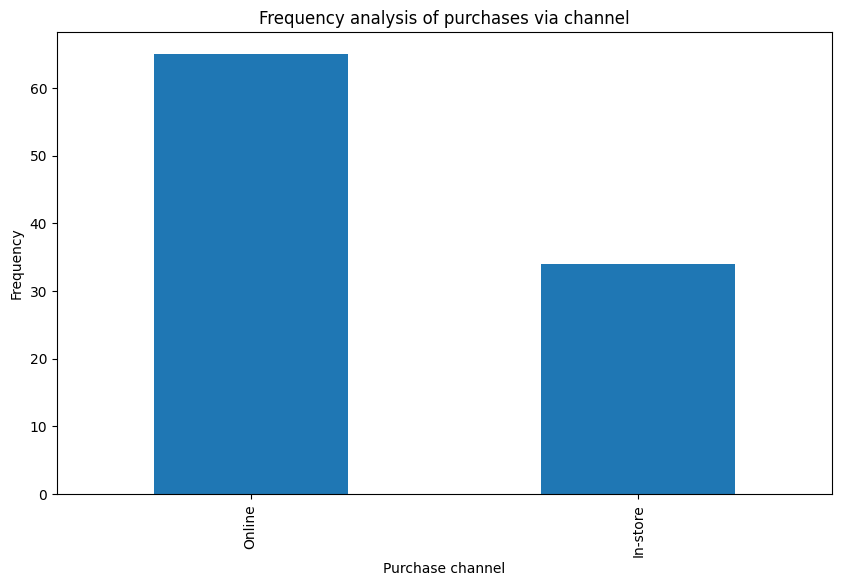

In [42]:
plt.figure(figsize= (10, 6))
freq_purchase_channel.plot(kind= 'bar')
plt.title('Frequency analysis of purchases via channel')
plt.xlabel('Purchase channel')
plt.ylabel('Frequency')
plt.show()

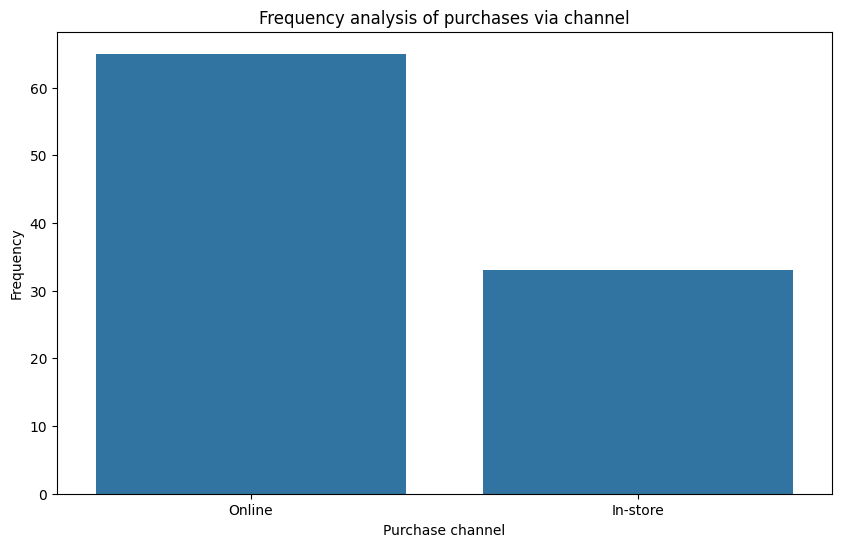

In [43]:
plt.figure(figsize= (10, 6))
sns.countplot(x= 'Purchase_Channel', data= final_data)
plt.title('Frequency analysis of purchases via channel')
plt.xlabel('Purchase channel')
plt.ylabel('Frequency')
plt.show()

## Stacked and clustered bar plot

<Figure size 1000x600 with 0 Axes>

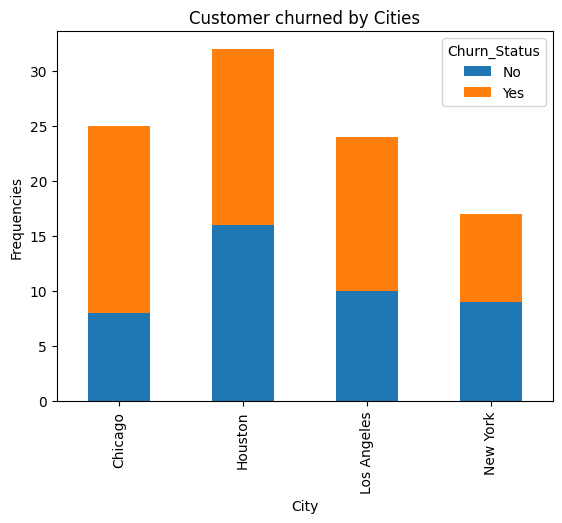

In [44]:
plt.figure(figsize= (10, 6))
cross_tab.plot(kind= 'bar', stacked= True) ## for cluster stacked = False, and for stacked, stacked = True
plt.title('Customer churned by Cities')
plt.xlabel('City')
plt.ylabel('Frequencies')
plt.show()

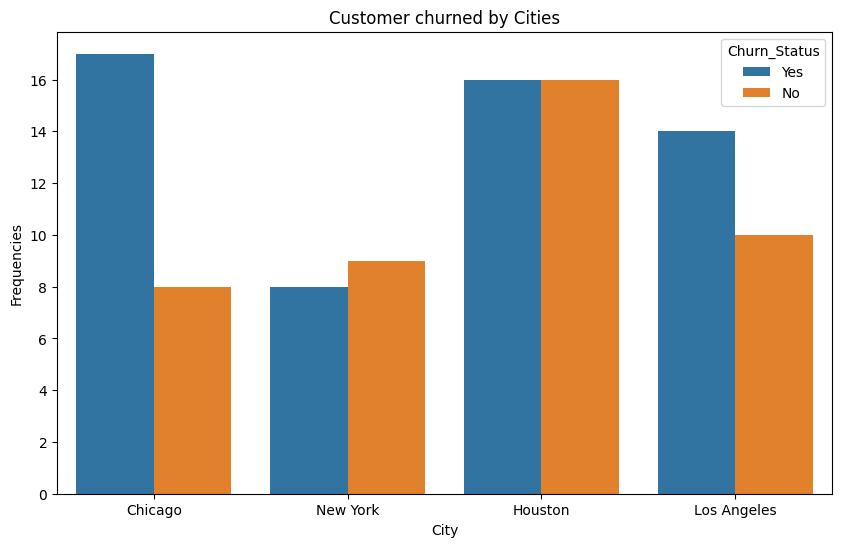

In [45]:
plt.figure(figsize= (10, 6))
sns.countplot(x = 'City', hue= 'Churn_Status', data = final_data)
plt.title('Customer churned by Cities')
plt.xlabel('City')
plt.ylabel('Frequencies')
plt.show()

## Pie chart for percentage analysis

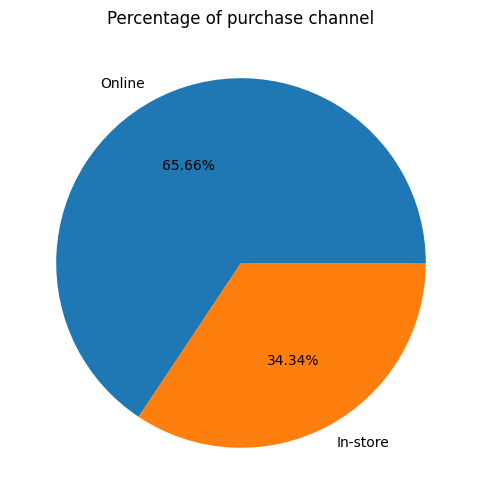

In [46]:
plt.figure(figsize= (10, 6))
perc_purcahse_channel.plot(kind= 'pie', autopct = '%1.2f%%')
plt.title('Percentage of purchase channel')
plt.ylabel('')
plt.show()

## Line chart for grouping analysis

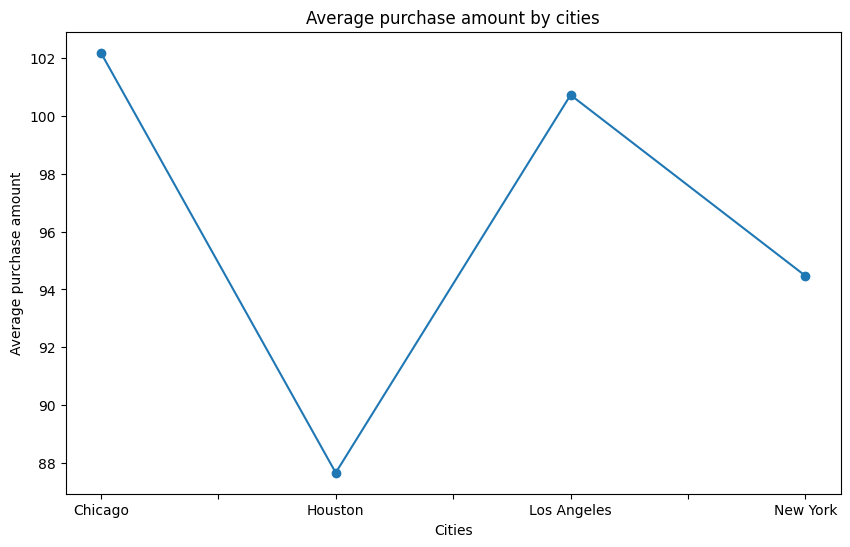

In [47]:
plt.figure(figsize= (10, 6))
city_purchase_amount.plot(kind = 'line', marker = 'o')
plt.title('Average purchase amount by cities')
plt.xlabel('Cities')
plt.ylabel('Average purchase amount')
plt.show()

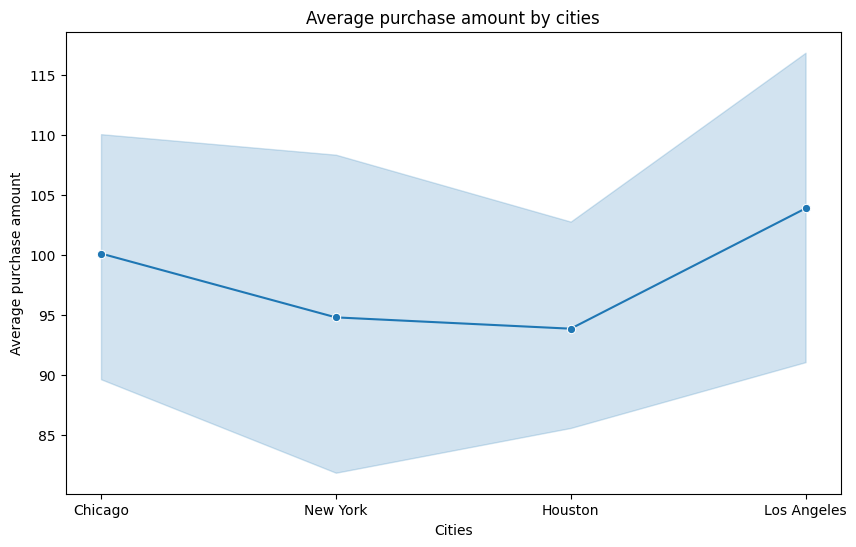

In [48]:
plt.figure(figsize= (10, 6))
sns.lineplot(x = 'City', y = 'Average_Purchase_Amount', data = final_data, marker = 'o')
plt.title('Average purchase amount by cities')
plt.xlabel('Cities')
plt.ylabel('Average purchase amount')
plt.show()

## Exploring distribution with histogram

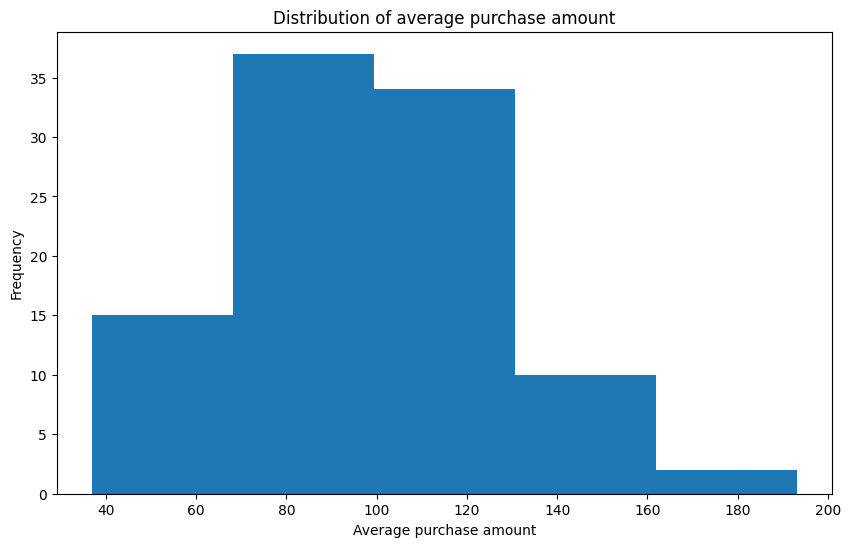

In [49]:
plt.figure(figsize= (10, 6))
final_data['Average_Purchase_Amount'].plot(kind= 'hist', bins = 5)
plt.title('Distribution of average purchase amount')
plt.xlabel('Average purchase amount')
plt.ylabel('Frequency')
plt.show()

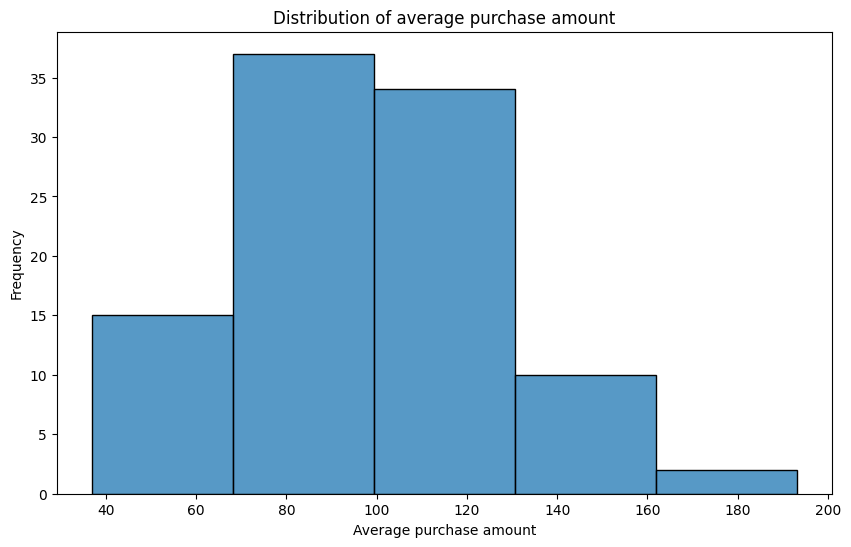

In [50]:
plt.figure(figsize= (10, 6))
sns.histplot(final_data['Average_Purchase_Amount'], bins=5)
plt.title('Distribution of average purchase amount')
plt.xlabel('Average purchase amount')
plt.ylabel('Frequency')
plt.show()

## Correlation analysis with scatterplot

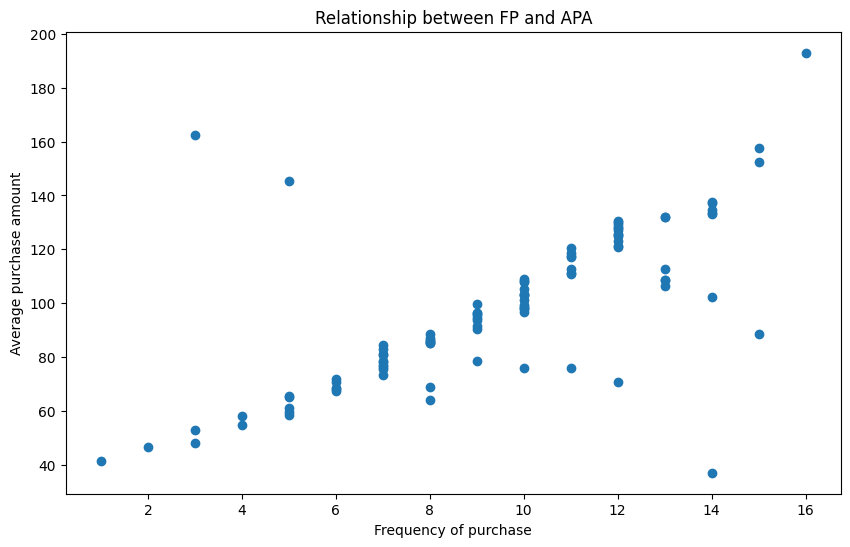

In [51]:
plt.figure(figsize= (10, 6))
plt.scatter(final_data['Frequency_of_Purchases'], final_data['Average_Purchase_Amount'])
plt.title('Relationship between FP and APA')
plt.xlabel('Frequency of purchase')
plt.ylabel('Average purchase amount')
plt.show()

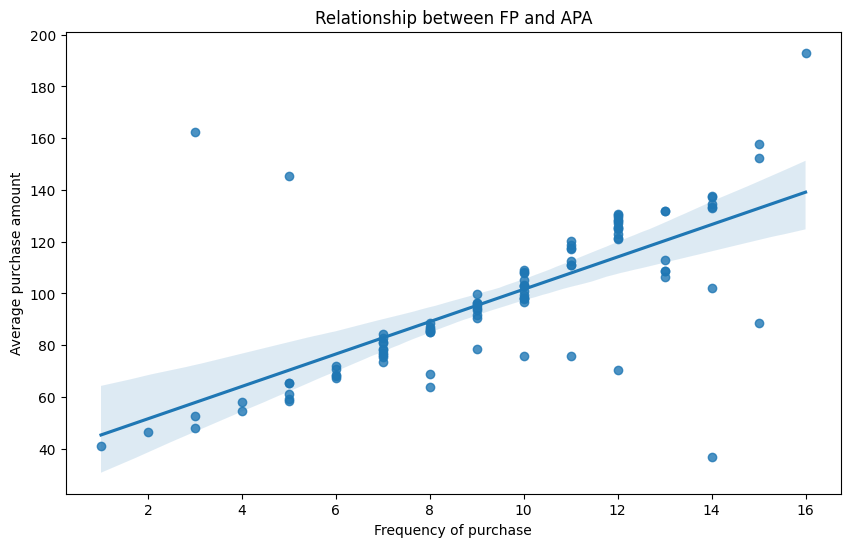

In [52]:
plt.figure(figsize= (10, 6))
sns.regplot(x = 'Frequency_of_Purchases', y= 'Average_Purchase_Amount', data=final_data)
plt.title('Relationship between FP and APA')
plt.xlabel('Frequency of purchase')
plt.ylabel('Average purchase amount')
plt.show()

## Matrix visualization with heatmap

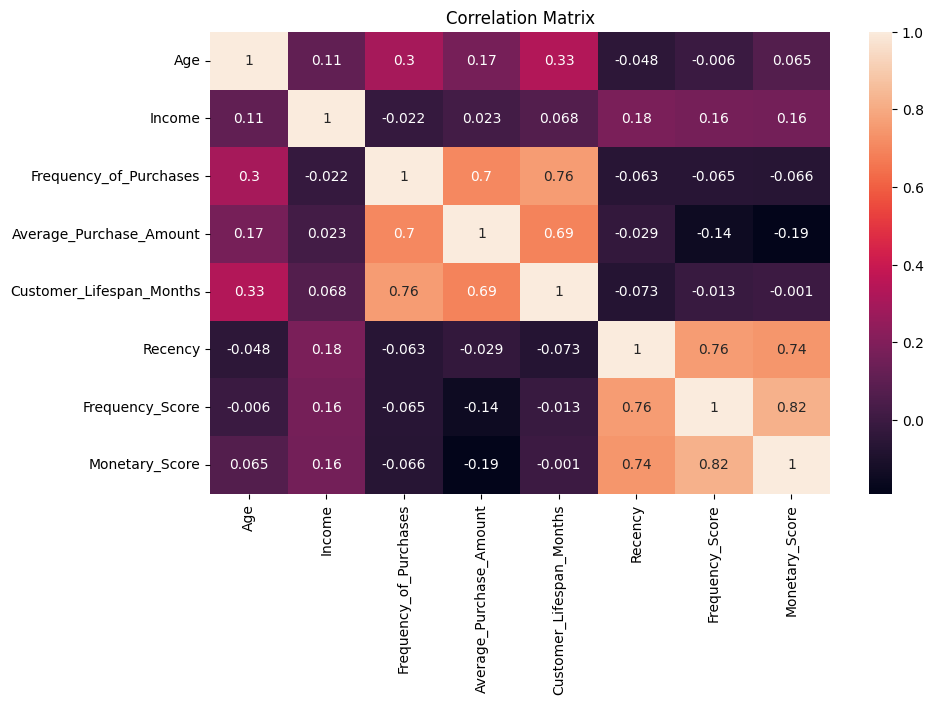

In [53]:
plt.figure(figsize= (10, 6))
sns.heatmap(correl, annot= True)
plt.title('Correlation Matrix')
plt.show()

## Boxplot visualization statistic

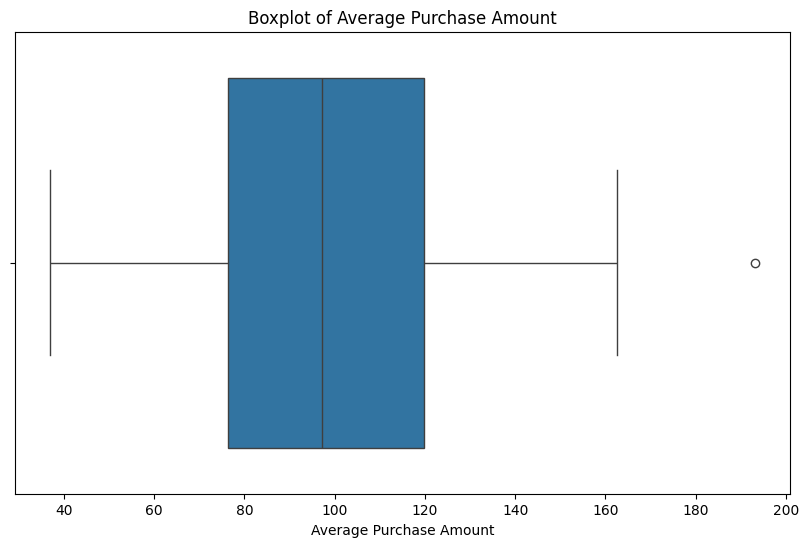

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= 'Average_Purchase_Amount', data= final_data)
plt.title('Boxplot of Average Purchase Amount')
plt.xlabel('Average Purchase Amount')
plt.show()

## Investigating distribution of numeric data

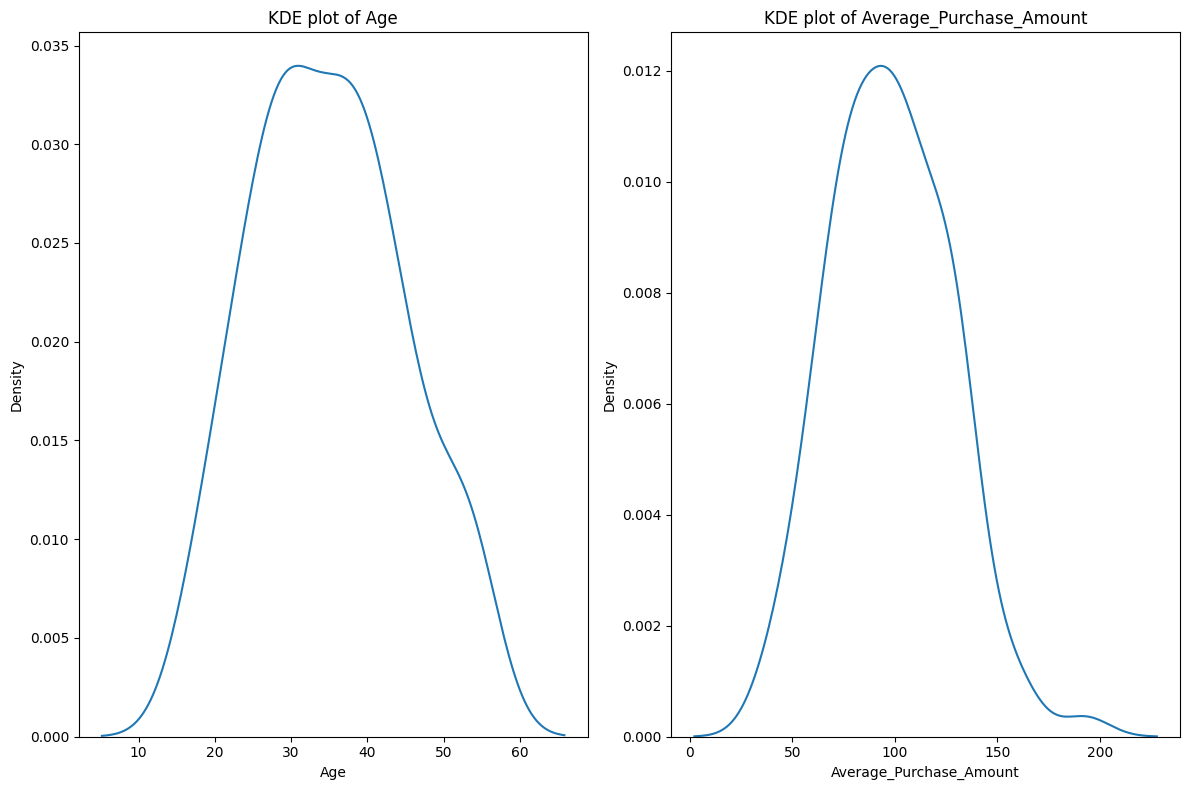

In [55]:
numeric_column = ['Age', 'Average_Purchase_Amount']

fig, axes = plt.subplots(1, 2, figsize= (12, 8))

for index, columm in enumerate(numeric_column) :
    sns.kdeplot(final_data[columm], ax = axes[index])
    axes[index].set_title(f'KDE plot of {columm}')

plt.tight_layout()
plt.show()

## Shapiro wilk test of normality

In [56]:
shapiro_result = {}

for columm in numeric_column :
    stats, p_value = shapiro(final_data[columm])
    shapiro_result[columm] = round(p_value, 3)

shapiro_result

{'Age': 0.037, 'Average_Purchase_Amount': 0.487}

## Square root transformation

Axes(0.125,0.11;0.775x0.77)
P Value:  0.09854088997154391


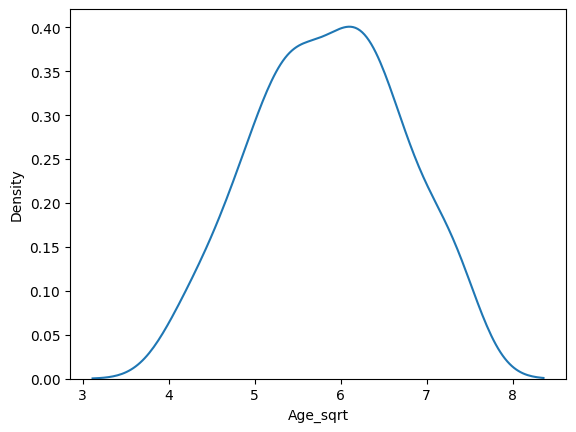

In [57]:
def sqrt_transformation(data, columm_name):
    data[f'{columm_name}_sqrt'] = np.sqrt(data[columm_name])
    stats, p_value = shapiro(data[f'{columm_name}_sqrt'])
    kdeplot = sns.kdeplot(data[f'{columm_name}_sqrt'])

    print(kdeplot)
    print('P Value: ', p_value)

sqrt_transformation(final_data, 'Age')

In [58]:
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226


## Logarithmic transformation method

Axes(0.125,0.11;0.775x0.77)
P value:  0.03301636122262527


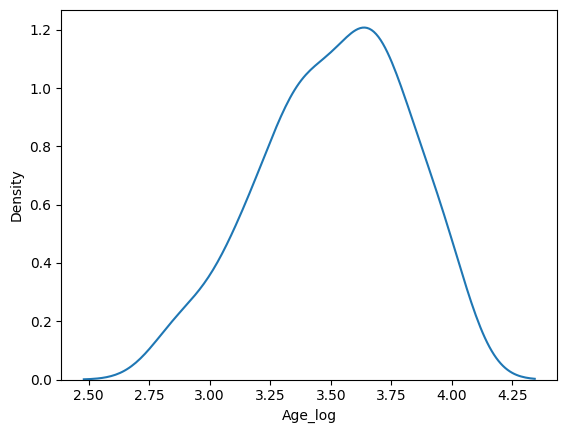

In [59]:
def log_transformation(data, columm_name):
    data[f'{columm_name}_log'] = np.log(data[columm_name])
    stats, p_value = shapiro(data[f'{columm_name}_log'])
    kdeplot = sns.kdeplot(data[f'{columm_name}_log'])

    print(kdeplot)
    print('P value: ', p_value)

log_transformation(final_data, 'Age')

In [60]:
final_data = final_data.drop('Age_log', axis = 1)
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226


## One sample t-test

In [63]:
hypothesized_mean = 68
alpha = 0.05

t_stat, p_value = stats.ttest_1samp(final_data['Average_Purchase_Amount'], hypothesized_mean)
print('P value: ', p_value)

if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P value:  3.765882799621164e-17
Reject the null hypothesis


## Independent sample t-test

In [64]:
churned_customer = final_data.query('Churn_Status == "Yes"')['Average_Purchase_Amount']
existing_customer = final_data.query('Churn_Status  == "No"')['Average_Purchase_Amount']

t_stat, p_value = stats.ttest_ind(churned_customer, existing_customer)
print('P value: ', p_value)

if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P value:  1.0775507203194482e-13
Reject the null hypothesis


In [65]:
churned_customer.mean()

114.96134545454547

In [66]:
existing_customer.mean()

76.42560465116279

## One way analysis of variance

In [67]:
stat, p_value = shapiro(final_data['Frequency_of_Purchases'])
print(p_value)

0.11246168308148519


In [68]:
chicago_cust = final_data.query('City == "Chicago"')['Frequency_of_Purchases']
newyork_cust = final_data.query('City == "New York"')['Frequency_of_Purchases']
houston_cust = final_data.query('City == "Houston"')['Frequency_of_Purchases']
losangeles_cust = final_data.query('City == "Los Angeles"')['Frequency_of_Purchases']

test_stat, p_value = stats.f_oneway(chicago_cust, newyork_cust,houston_cust, losangeles_cust)
print('P value: ', p_value)

if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P value:  0.09375619087069023
Fail to reject the null hypothesis


In [69]:
stats, p_value = levene(chicago_cust, newyork_cust, houston_cust
                        , losangeles_cust)
print('P value: ', p_value)

P value:  0.5007918375821456


## Chi square test of independence

In [70]:
cross_tab = pd.crosstab(final_data['Purchase_Channel'], final_data['Region'])

chi2, p_value, dof, expected = chi2_contingency(cross_tab)
print('P value: ', p_value)

if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P value:  0.6283610417134611
Fail to reject the null hypothesis


## Pearson correlation analysis

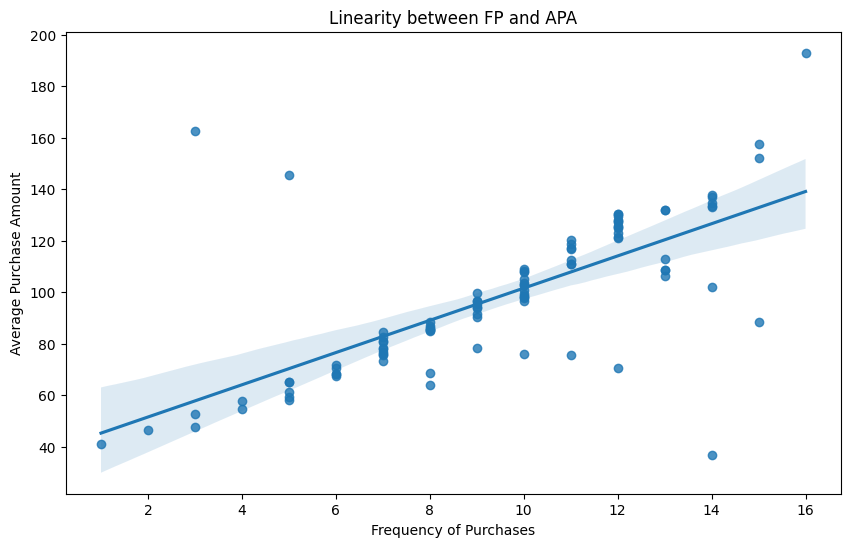

In [71]:
plt.figure(figsize= (10, 6))
sns.regplot(x = 'Frequency_of_Purchases', y = 'Average_Purchase_Amount', data= final_data)
plt.title('Linearity between FP and APA')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Average Purchase Amount')
plt.show()

In [72]:
purchase_frequency = final_data['Frequency_of_Purchases']
purchase_amount = final_data['Average_Purchase_Amount']

corr, p_value = pearsonr(purchase_frequency, purchase_amount)
print('Correlation coefficient: ', corr)
print('P value: ', p_value)

if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Correlation coefficient:  0.7039911501130026
P value:  6.176786543555055e-16
Reject the null hypothesis


## Linear regression analysis

In [73]:
x = final_data['Frequency_of_Purchases']
y = final_data['Average_Purchase_Amount']

x_constant = sm.add_constant(x)
model = sm.OLS(y, x_constant).fit()

print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Average_Purchase_Amount   R-squared:                       0.496
Model:                                 OLS   Adj. R-squared:                  0.490
Method:                      Least Squares   F-statistic:                     94.33
Date:                     Sun, 01 Dec 2024   Prob (F-statistic):           6.18e-16
Time:                             18:28:29   Log-Likelihood:                -435.04
No. Observations:                       98   AIC:                             874.1
Df Residuals:                           96   BIC:                             879.3
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

## Generating new features

In [74]:
final_data['Customer_value'] = final_data['Frequency_of_Purchases'] * final_data['Average_Purchase_Amount']
final_data['CLV'] = final_data['Customer_value'] * final_data['Customer_Lifespan_Months']
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,CLV
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000,982.410,2947.230
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414,2364.600,9458.400
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106,41.252,41.252
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952,403.974,403.974
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226,158.289,158.289


## Extracting day, month, year

In [75]:
final_data['Date_of_Purchase'] = final_data['Date_of_Purchase'].astype('datetime64[ns]')

final_data['year'] = final_data['Date_of_Purchase'].dt.year
final_data['month'] = final_data['Date_of_Purchase'].dt.month
final_data['day'] = final_data['Date_of_Purchase'].dt.day

final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,...,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,CLV,year,month,day
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,...,Yes,3,2,2,7.000000,982.410,2947.230,2022,3,5
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,...,Yes,3,3,3,6.164414,2364.600,9458.400,2023,7,8
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,...,No,4,4,4,4.123106,41.252,41.252,2023,1,30
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,...,No,2,2,2,5.830952,403.974,403.974,2023,6,1
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,...,No,1,1,1,5.477226,158.289,158.289,2022,9,23


In [76]:
final_data = final_data.drop('Date_of_Purchase', axis= 1)
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,CLV,year,month,day
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,Yes,3,2,2,7.000000,982.410,2947.230,2022,3,5
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,Yes,3,3,3,6.164414,2364.600,9458.400,2023,7,8
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,No,4,4,4,4.123106,41.252,41.252,2023,1,30
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,No,2,2,2,5.830952,403.974,403.974,2023,6,1
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,No,1,1,1,5.477226,158.289,158.289,2022,9,23


## Encoding features - label encoding

In [77]:
encoder = LabelEncoder()
final_data['Churn_Status'] = encoder.fit_transform(final_data['Churn_Status'])
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,CLV,year,month,day
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,1,3,2,2,7.000000,982.410,2947.230,2022,3,5
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,1,3,3,3,6.164414,2364.600,9458.400,2023,7,8
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,0,4,4,4,4.123106,41.252,41.252,2023,1,30
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,2,2,2,5.830952,403.974,403.974,2023,6,1
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,0,1,1,1,5.477226,158.289,158.289,2022,9,23


## Categorizing numeric features

In [78]:
final_data['Engagement_level'] = pd.cut(final_data['Customer_Lifespan_Months'],
                                        bins = [0, 2, 3, 5],
                                        labels= ['Low engagement', 'Moderately engagement', 'Highly engagement'],
                                        include_lowest= True)
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,...,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,CLV,year,month,day,Engagement_level
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,...,3,2,2,7.000000,982.410,2947.230,2022,3,5,Moderately engagement
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,...,3,3,3,6.164414,2364.600,9458.400,2023,7,8,Highly engagement
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,...,4,4,4,4.123106,41.252,41.252,2023,1,30,Low engagement
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,...,2,2,2,5.830952,403.974,403.974,2023,6,1,Low engagement
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,...,1,1,1,5.477226,158.289,158.289,2022,9,23,Low engagement


## Converting features into dummy

In [79]:
final_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'City', 'Region',
       'Frequency_of_Purchases', 'Average_Purchase_Amount',
       'Customer_Lifespan_Months', 'Purchase_Channel', 'Churn_Status',
       'Recency', 'Frequency_Score', 'Monetary_Score', 'Age_sqrt',
       'Customer_value', 'CLV', 'year', 'month', 'day', 'Engagement_level'],
      dtype='object')

In [80]:
dummies = pd.get_dummies(final_data[['Gender', 'City', 'Region', 'Purchase_Channel']]).astype(int)
final_data = pd.concat([final_data, dummies], axis=1)
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,...,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_New York,Region_Midwest,Region_Northeast,Region_West,Purchase_Channel_In-store,Purchase_Channel_Online
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,...,1,1,0,0,0,0,1,0,0,1
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,...,0,0,0,0,1,0,0,1,1,0
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,...,1,0,0,0,1,0,1,0,0,1
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,...,1,1,0,0,0,1,0,0,1,0
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,...,1,0,1,0,0,1,0,0,0,1


In [81]:
x_reg = final_data.drop(['CustomerID', 'Gender', 'City', 'Region', 'Purchase_Channel','CLV'], axis= 1 )
y_reg = final_data['CLV']
x_reg

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,...,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_New York,Region_Midwest,Region_Northeast,Region_West,Purchase_Channel_In-store,Purchase_Channel_Online
0,49,72504.0,10,98.241,3,1,3,2,2,7.000000,...,1,1,0,0,0,0,1,0,0,1
1,38,40881.0,15,157.640,4,1,3,3,3,6.164414,...,0,0,0,0,1,0,0,1,1,0
2,17,63333.0,1,41.252,1,0,4,4,4,4.123106,...,1,0,0,0,1,0,1,0,0,1
3,34,58030.0,6,67.329,1,0,2,2,2,5.830952,...,1,1,0,0,0,1,0,0,1,0
4,30,78889.0,3,52.763,1,0,1,1,1,5.477226,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,32,18600.0,12,123.003,4,1,4,2,3,5.656854,...,1,1,0,0,0,0,1,0,0,1
95,38,68525.0,13,106.526,4,1,4,3,3,6.164414,...,1,1,0,0,0,0,0,1,0,1
96,24,73538.0,3,162.533,1,1,2,1,1,4.898979,...,0,0,1,0,0,0,0,1,1,0
97,20,47251.0,5,145.404,2,0,4,3,1,4.472136,...,0,1,0,0,0,1,0,0,1,0


In [82]:
x_class = final_data.drop(['CustomerID', 'Gender', 'City', 'Region', 'Purchase_Channel','Churn_Status'], axis= 1 )
y_class = final_data['Churn_Status']
x_class

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Customer_value,...,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_New York,Region_Midwest,Region_Northeast,Region_West,Purchase_Channel_In-store,Purchase_Channel_Online
0,49,72504.0,10,98.241,3,3,2,2,7.000000,982.410,...,1,1,0,0,0,0,1,0,0,1
1,38,40881.0,15,157.640,4,3,3,3,6.164414,2364.600,...,0,0,0,0,1,0,0,1,1,0
2,17,63333.0,1,41.252,1,4,4,4,4.123106,41.252,...,1,0,0,0,1,0,1,0,0,1
3,34,58030.0,6,67.329,1,2,2,2,5.830952,403.974,...,1,1,0,0,0,1,0,0,1,0
4,30,78889.0,3,52.763,1,1,1,1,5.477226,158.289,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,32,18600.0,12,123.003,4,4,2,3,5.656854,1476.036,...,1,1,0,0,0,0,1,0,0,1
95,38,68525.0,13,106.526,4,4,3,3,6.164414,1384.838,...,1,1,0,0,0,0,0,1,0,1
96,24,73538.0,3,162.533,1,2,1,1,4.898979,487.599,...,0,0,1,0,0,0,0,1,1,0
97,20,47251.0,5,145.404,2,4,3,1,4.472136,727.020,...,0,1,0,0,0,1,0,0,1,0
